# Single Cell RNA Seq Data Analysis using Seurat_part_1

In [1]:
# Suppress warning
options(warn = -1)

In [2]:
install.packages("Seurat")


Installing package into ‘/home/jovyan/R/x86_64-conda-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [3]:
install.packages("hdf5r")


Installing package into ‘/home/jovyan/R/x86_64-conda-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [4]:
#loading package
library(Seurat)
suppressPackageStartupMessages(library(tidyverse)) # To suppressing warning
library(hdf5r)

# Ensure plots render inline
options(jupyter.plot_mimetypes = c("image/png"))

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘hdf5r’


The following object is masked from ‘package:purrr’:

    flatten_df




In [5]:
# Read the full data from the .h5 file
counts <- Read10X_h5("/home/jovyan/40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")


Genome matrix has multiple modalities, returning a list of matrices for this genome



In [6]:
# Check the structure of the counts object
str(counts)


List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:150360352] 11692 26583 2510 8755 11717 13480 23180 29255 500 23118 ...
  .. ..@ p       : int [1:4387769] 0 2 8 12 15 15 17 19 22 22 ...
  .. ..@ Dim     : int [1:2] 36601 4387768
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:4387768] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:150360352] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:2221673] 7 1 4 0 0 1 2 3 4 6 ...
  .. ..@ p       : int [1:4387769] 0 1 1 1 1 1 1 1 2 2 ...
  .. ..@ Dim     : int [1:2] 9 4387768
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:4387768] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1"

In [7]:
# Extract gene expression data
gene_expression_matrix <- counts$`Gene Expression`

# Check the dimensions
dim(gene_expression_matrix)


[1]   36601 4387768

In [8]:
# Check the first few gene names
head(rownames(gene_expression_matrix))

# Check the first few cell IDs
head(colnames(gene_expression_matrix))


[1] "MIR1302-2HG" "FAM138A"     "OR4F5"       "AL627309.1"  "AL627309.3" 
[6] "AL627309.2"

[1] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1"
[4] "AAACCCAAGAAACCCG-1" "AAACCCAAGAAACGAA-1" "AAACCCAAGAAACTAC-1"

### Create a Seurat Object

In [9]:
# Create a Seurat object
#lung.seurat.obj <- CreateSeuratObject(counts = counts)
#lung.seurat.obj <- CreateSeuratObject(counts = counts, min.cells = 3, min.features = 200)
#str(lung.seurat.obj)
#lung.seurat.obj


# Create Seurat object using only gene expression data
lung.seurat.obj <- CreateSeuratObject(counts = gene_expression_matrix, project = "NSCLC", min.cells = 3, min.features = 200)

# Check the structure of the Seurat object
str(lung.seurat.obj)


Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:125873930] 23 24 64 142 187 395 442 495 517 618 ...
  .. .. .. .. .. .. ..@ p       : int [1:58987] 0 474 2283 4627 9387 17892 20194 21463 22782 25258 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 31117 58986
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:125873930] 1 1 1 2 1 1 2 2 3 2 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:58986, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. 

### Quality Control

In [10]:
# 1. QC -------
#View(lung.seurat.obj@meta.data)
# % MT reads
lung.seurat.obj[["percent.mt"]] <- PercentageFeatureSet(lung.seurat.obj, pattern = "^MT-")
#View(lung.seurat.obj@meta.data)

head(lung.seurat.obj@meta.data, 3)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAGGATCC-1,NSCLC,709,474,0.5641749
AAACCCAAGAGTACCG-1,NSCLC,4562,1809,4.4498027
AAACCCAAGATGGCGT-1,NSCLC,6897,2344,1.7833841


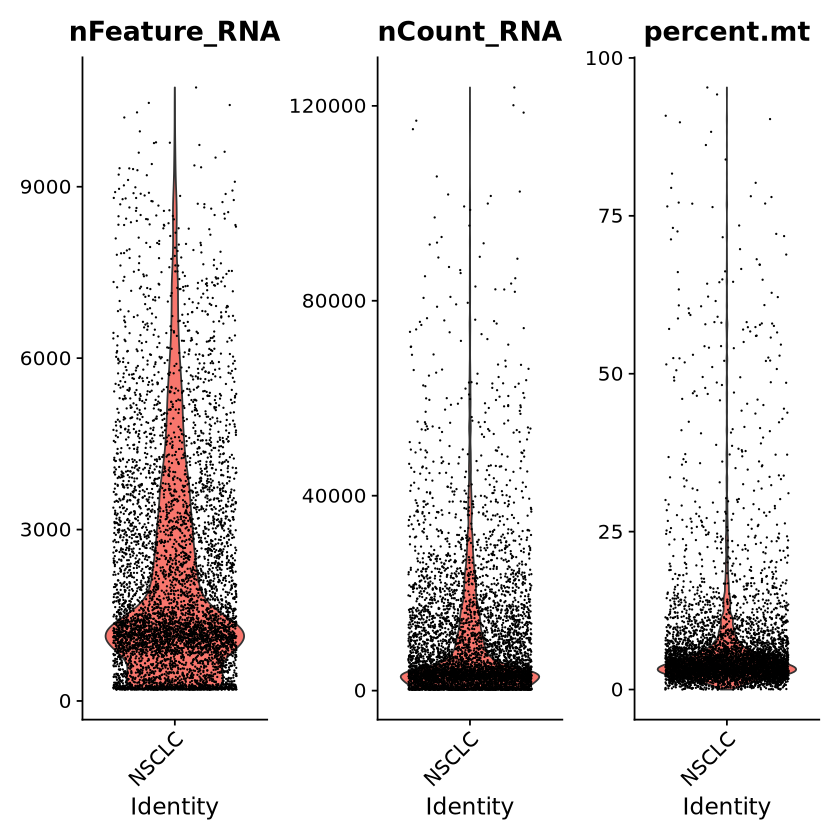

In [11]:
#Takes very long time to get the plot done for all cells
#VlnPlot(lung.seurat.obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# nFeature_RNA refers to the number of genes detected in each cell.
#Count_RNA metric in Seurat refers to the total number of RNA molecules (or reads) detected in a cell.
#High nCount_RNA: Could indicate a high level of gene expression, but it could also reflect a larger cell size or cells that are stressed or in a unique biological state.

#percent.mt refers to the percentage of mitochondrial genes in each cell.

# Subsample 10% of the cells for the plot to get overview 
set.seed(123)
subset_cells <- sample(Cells(lung.seurat.obj), size = 0.1 * length(Cells(lung.seurat.obj)))  # 10% of cells


# Create a subset Seurat object
lung.seurat.obj_subset <- subset(lung.seurat.obj, cells = subset_cells)

# Plot the violin plot on the subset
VlnPlot(lung.seurat.obj_subset, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.001)



In [12]:
# Quality control and filtering

lung.seurat.obj <- subset(lung.seurat.obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

head(lung.seurat.obj)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAGGATCC-1,NSCLC,709,474,0.5641749
AAACCCAAGAGTACCG-1,NSCLC,4562,1809,4.4498027
AAACCCAAGATGGCGT-1,NSCLC,6897,2344,1.7833841
AAACCCAAGCTGGTGA-1,NSCLC,7087,2302,3.7815719
AAACCCAAGGTAAACT-1,NSCLC,3041,1269,3.0910885
AAACCCAAGTCCTGCG-1,NSCLC,10445,2476,1.2158928
AAACCCAAGTGGCAGT-1,NSCLC,316,261,1.5822785
AAACCCAAGTTACTCG-1,NSCLC,5577,1955,2.7254796
AAACCCACAAGAGAGA-1,NSCLC,5054,1578,4.8872180


### Normalization

In [13]:
# Normalize data
lung.seurat.obj <- NormalizeData(lung.seurat.obj, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



### Identify Highly Variable Genes or features for downstream analysis

In [14]:
# Find highly variable features first
lung.seurat.obj <- FindVariableFeatures(lung.seurat.obj, selection.method = "vst", nfeatures = 2000)

# Now, check the top 10 variable features
#top10 <- head(VariableFeatures(lung.seurat.obj), 10)

# Create the variable feature plot again
#plot1 <- VariableFeaturePlot(lung.seurat.obj, pt.size = 0.001)

# Customize the plot using theme() to reduce margins or text size
#plot1 <- plot1 + theme(
#  plot.margin = margin(5, 5, 5, 5),     # Reduce plot margins
#  text = element_text(size = 9)          # Reduce text size (optional)
#)

# Label the top 10 variable genes
#plot1 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

# Display the plot
#plot1

Finding variable features for layer counts



In [15]:

# Extract the names of all highly variable features
all_var_features <- VariableFeatures(lung.seurat.obj)

# Calculate the number of top features to keep (100% of the total)
top_20_percent <- floor(length(all_var_features) * 1)

# Select the top 20% of variable features
top_20_var_features <- all_var_features[1:top_20_percent]

# Subset Seurat object to include only the top 20% variable features
lung.seurat.obj_subset <- lung.seurat.obj[top_20_var_features, ]


When using repel, set xnudge and ynudge to 0 for optimal results



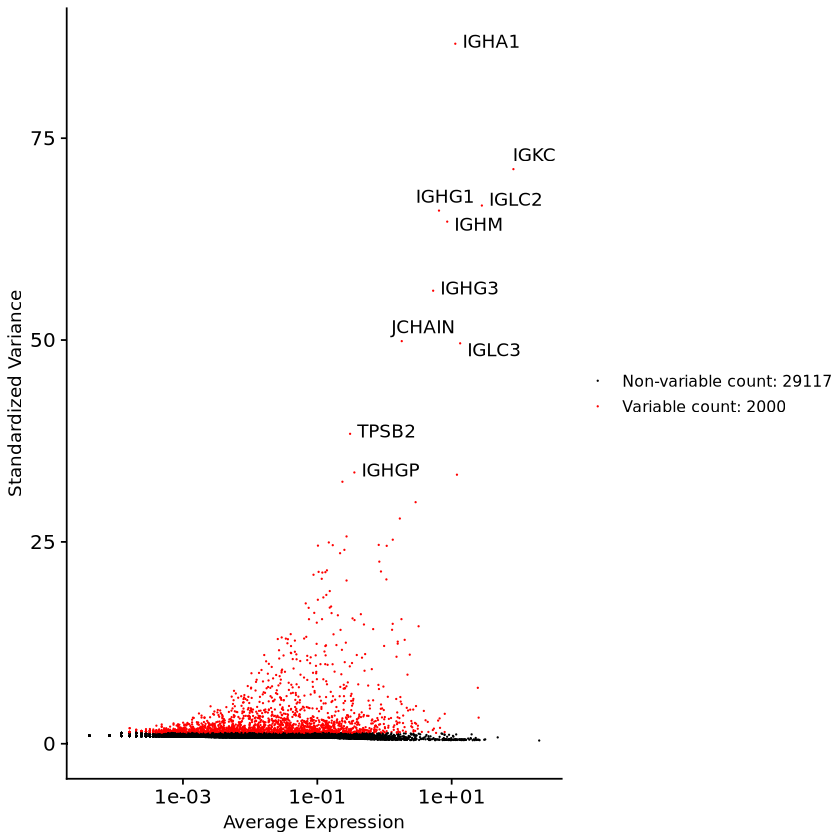

In [16]:
library(ggplot2)
# Now, check the top 10 variable features
top10 <- head(VariableFeatures(lung.seurat.obj), 10)

# Create the variable feature plot again
plot1 <- VariableFeaturePlot(lung.seurat.obj, pt.size = 0.001)

# Customize the plot using theme() to reduce margins or text size
plot1 <- plot1 + theme(
  plot.margin = margin(5, 5, 5, 5),     # Reduce plot margins
  text = element_text(size = 11)          # Reduce text size (optional)
)

# Label the top 10 variable genes
plot1 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

# Display the plot
plot1

### Scaling

In [17]:
# Scale the data
lung.seurat.obj <- ScaleData(lung.seurat.obj, features = rownames(lung.seurat.obj))

Centering and scaling data matrix



### Dimentionality Reduction

In [18]:
# Perform PCA
lung.seurat.obj <- RunPCA(lung.seurat.obj, features = VariableFeatures(lung.seurat.obj))

PC_ 1 
Positive:  AIF1, CD68, TYROBP, C5AR1, FCER1G, PLAUR, OLR1, IFI30, CD14, FCGR2A 
	   CST3, S100A9, AC020656.1, NCF2, S100A8, LYZ, C15orf48, TREM1, PLXDC2, VCAN 
	   THBD, SERPINA1, MS4A6A, LST1, CTSB, SMIM25, CTSS, IGSF6, ETS2, MRC1 
Negative:  CD69, IL32, LTB, CCL5, CD7, ITM2A, KLRB1, IL7R, GZMA, BIRC3 
	   ICOS, TIGIT, CD27, GZMK, IFNG, TNFRSF18, KLRK1, IGKC, GPR171, CCR7 
	   TNFRSF4, CTSW, LINC01871, NKG7, GZMH, FKBP11, CTLA4, KLRD1, PASK, CD8B 
PC_ 2 
Positive:  BGN, SPARCL1, RND3, MGP, NNMT, CCN1, TCIM, DCN, IGFBP7, KRT19 
	   ELF3, NUPR1, C1S, KRT18, KRT8, CTTN, C11orf96, AKR1C1, TPM1, FTL 
	   ADIRF, CCDC80, SERPING1, TAGLN, S100A13, AKR1C2, MDK, SOX4, TPM2, COL1A2 
Negative:  CD69, ZNF331, S100A4, LTB, BIRC3, CCL5, TXNIP, CLEC2B, RGS1, CD7 
	   IL32, NR4A2, CST7, NKG7, IL7R, GPR65, GPR183, GZMA, GZMB, ITM2A 
	   CTSW, AREG, VIM, RGS2, KLRD1, LDLRAD4, ALOX5AP, IFNG, KLRK1, CD83 
PC_ 3 
Positive:  IL32, CCL5, CD7, NKG7, CST7, GZMA, CLEC2B, IL7R, S100A4, KLRD1 
	   CTSW, AN

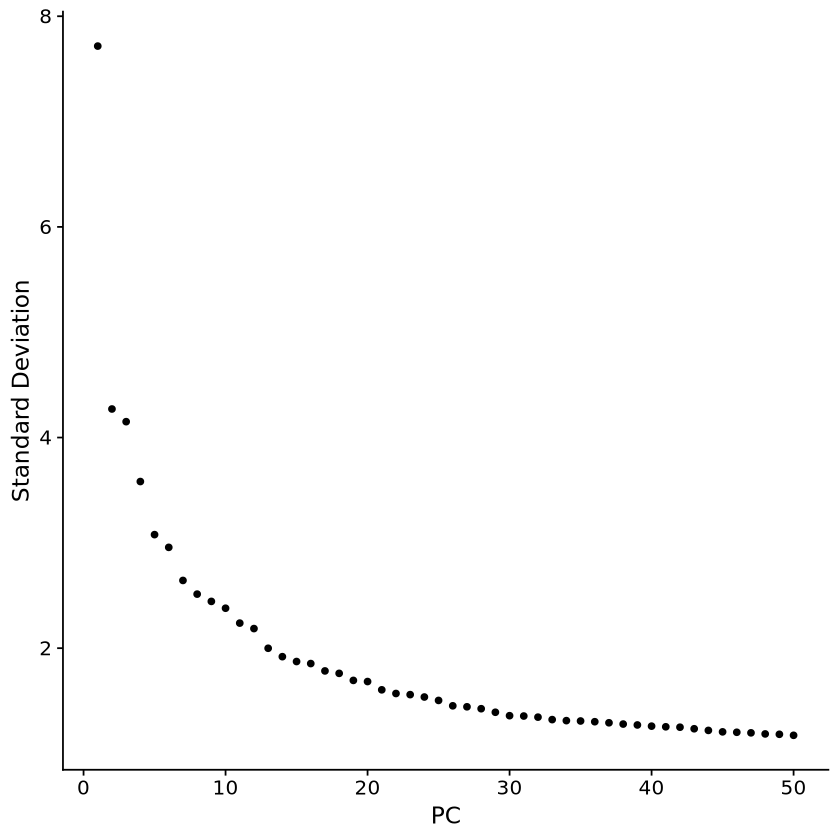

In [19]:
ElbowPlot(lung.seurat.obj, ndims = 50)


PC_ 1 
Positive:  AIF1, CD68, TYROBP, C5AR1, FCER1G 
Negative:  CD69, IL32, LTB, CCL5, CD7 
PC_ 2 
Positive:  BGN, SPARCL1, RND3, MGP, NNMT 
Negative:  CD69, ZNF331, S100A4, LTB, BIRC3 
PC_ 3 
Positive:  IL32, CCL5, CD7, NKG7, CST7 
Negative:  BANK1, CD79A, HLA-DRA, HLA-DQA1, MEF2C 
PC_ 4 
Positive:  FTL, SPP1, LYZ, S100A9, KRT19 
Negative:  TCF4, BGN, SPARCL1, MEF2C, NNMT 
PC_ 5 
Positive:  TNFRSF4, MAF, CTLA4, ICA1, MAGEH1 
Negative:  GZMB, NKG7, KLRD1, CCL5, KLRK1 


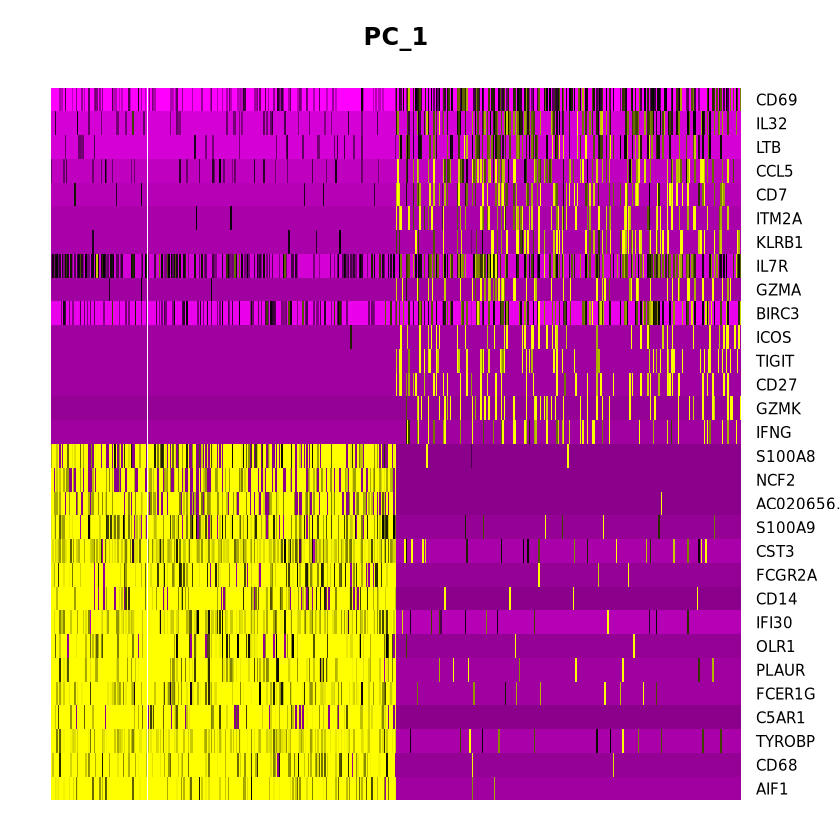

In [20]:
# Visualise PCA with top 5 features
print(lung.seurat.obj[["pca"]], dims = 1:5, nfeatures = 5)


#visualizing the PCA heatmap for the first PC using 500 cells
DimHeatmap(lung.seurat.obj, dims = 1, cells = 500, balanced = TRUE)

#Save heatmap to PNG but do NOT print to notebook
invisible(
  png("PCA_heatmap_PC1.png", width = 1000, height = 700)
)


In [ ]:
# Save Seurat object to disk
saveRDS(lung.seurat.obj, file = "lung_seurat_NSCLC.rds")

In [ ]:
file.info("scRNAseq_Analysis_Seurat_Part_1.ipynb")$size / (1024^2)  # Size in MB


In [ ]:
cat(system("df -h", intern = TRUE), sep = "\n")

